In [2]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [3]:
full_df = pd.read_csv('alldata.csv')
full_df.head()

,SAMPN,PERNO,PLANO,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,...,VEHDRT,O_VEHDRT,VEHCYL,O_VEHCYL,VEHOUT,VEHVLT,VEHT,CNTV,WYCNTV,O_WYCNTV
0,1031985.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1031985.0,1.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1031985.0,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1031985.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1031985.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset is extensive even without including the date-time and API data:

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406413 entries, 0 to 1406412
Columns: 362 entries, SAMPN to O_WYCNTV
dtypes: float64(283), object(79)
memory usage: 3.8+ GB


In [5]:
column_names = full_df.columns.tolist()
print(column_names)

['SAMPN', 'PERNO', 'PLANO', 'TOTTR', 'HHMEM', 'PER1', 'PER2', 'PER3', 'PER4', 'PER5', 'NONHH', 'MODE', 'VEHNO', 'DYGOV', 'PRKTY', 'O_PRKTY', 'PXSTR', 'PRKMIN', 'PAYPK', 'PKAMT', 'PKUNT', 'PRKHW', 'O_PRKHW', 'EMPARK', 'TRANSYS', 'O_TRANSYS', 'ROUTE', 'ACTCNT', 'ARR_HR', 'ARR_MIN', 'DEP_HR', 'DEP_MIN', 'TRIPDUR', 'ACTDUR', 'PNAME', 'CITY', 'STATE', 'ZIP', 'TripDistance', 'TripDistanceFlag', 'AirTripDistance', 'CTFIP', 'TRACT', 'PPrimaryCity', 'PSTFIP', 'PERWGT', 'EXPPERWGT', 'TRIPNO', 'TCF', 'TCFPERWGT', 'EXPTCFPERWGT', 'ACTNO', 'ACTOTH', 'ACTHH', 'ACTOR', 'ACTWK', 'ACTSC', 'ACTRG', 'ACTFR', 'ACTOT', 'APURP', 'O_APURP', 'STIME', 'ETIME', 'RECMODE', 'RETMODE', 'INCEN', 'ILANG', 'AREA', 'STRATA', 'STYPE', 'CEC', 'GTYPE', 'GFLAG', 'RIBUS', 'HHVEH', 'HHBIC', 'VEHNEW', 'BUYER1', 'BUYER2', 'BUYER3', 'BUYER4', 'BUYER5', 'BUYER6', 'BUYER7', 'BUYER8', 'RESTY', 'O_RESTY', 'OWN', 'O_OWN', 'TEN', 'PREVCITY', 'PREVSTAT', 'PREVZIP', 'PHLNS', 'INCOM', 'HHSIZ', 'NONRELAT', 'HHEMP', 'HHSTU', 'HHLIC', 'RE

Drop columns related to long-distance trips, as our focus is on daily trips; including long-distance trips could introduce outliers and negatively impact model predictions. To safeguard the original data, we created a separate variable to store the modified DataFrame, allowing easy rollback if needed.

Now, drop columns that are entirely empty, as these were optional survey responses with no data provided.

In [6]:
# Define the threshold for missing values
missing_value_threshold = 99.9

# Identify columns with more than 99% missing values in full_df
missing_percentage = full_df.isnull().mean() * 100  # Calculate the percentage of missing values
columns_to_drop = missing_percentage[missing_percentage > missing_value_threshold].index.tolist()

# Drop the identified columns from full_df
mod_df = full_df.drop(columns=columns_to_drop)

# Output the list of columns that were dropped
print("Columns dropped (more than 99% missing values):")
print(columns_to_drop)
print("# of columns dropped: {}".format(len(columns_to_drop)))

Columns dropped (more than 99% missing values):
['O_PRKTY', 'PKAMT', 'PKUNT', 'PRKHW', 'O_PRKHW', 'EMPARK', 'O_TRANSYS', 'CEC', 'BUYER3', 'BUYER4', 'BUYER5', 'BUYER6', 'BUYER7', 'BUYER8', 'O_RESTY', 'O_OWN', 'HHNOV2', 'HHNOV3', 'HHNOV4', 'HHNOV5', 'HHNOV6', 'HHNOV7', 'HHNOV8', 'LDPER2', 'LDPER3', 'LDPER4', 'LDPER5', 'LDPER6', 'LDPER7', 'LDPER8', 'O_LDTPUPR', 'LDINI2', 'LDINI3', 'LDINI4', 'LDINI5', 'LDINI6', 'LDINI7', 'LDINI8', 'LDMODE2', 'LDMODE3', 'LDMODE4', 'LDDPMODE2', 'LDDPMODE3', 'LDDPMODE4', 'LDARMODE2', 'LDARMODE3', 'LDARMODE4', 'RACE3', 'RACE4', 'TPTYP2', 'TPTYP3', 'TPTYP4', 'TPTYP5', 'TPTYP6', 'TPTYP7', 'CLIP2', 'CLIP3', 'COMP', 'MET', 'O_WKSTAT', 'O_INDUS', 'O_OCCUP', 'WXST2_1', 'WXST2_2', 'DTYPE3', 'DTYPE4', 'DTYPE5', 'DTYPE6', 'DTYPE7', 'O_SUBUNT', 'O_SCHOL', 'PRESCH', 'O_PRESCH', 'O_EDUCA', 'TOLLR1', 'TOLLR2', 'TOLLR3', 'TOLLR4', 'TOLLR5', 'TOLLR6', 'TOLLR7', 'TOLLR8', 'TOLLR9', 'TOLLR10', 'TOLLB1', 'TOLLB2', 'TOLLB3', 'TOLLB4', 'TOLLB5', 'TOLLB6', 'TOLLB7', 'TOLLB8', 'TOL

Before cleaning & organizing the data further, we need to combine the "ASSN_TravelDate.csv" file into the main dataset. This is a dataset that records travel assignments with three key columns: ASSN, TDATE, and day_name. Each row represents a unique assignment (indicated by ASSN) associated with a specific date (TDATE), formatted as YYYY-MM-DD, and the corresponding day of the week (day_name).

In [8]:
assn_date = pd.read_csv('ASSN_TravelDate.csv')
assn_date.head()

,ASSN,TDATE,day_name
0,101,2009-01-01,Thursday
1,102,2009-01-02,Friday
2,105,2009-01-05,Monday
3,106,2009-01-06,Tuesday
4,107,2009-01-07,Wednesday


The full dataset includes a column named “ASSN” with unique values, which can be used as a key to merge date and time information for future temporal analysis.

In [9]:
unique_values = mod_df['ASSN'].unique()
print("Unique values (first 10):", unique_values[:10])

Unique values (first 10): [   nan 12622. 12633. 12792. 12719. 13111. 12625. 12628. 12685. 12643.]


In [10]:
mod_df_with_dates = mod_df.merge(assn_date[['ASSN', 'TDATE', 'day_name']], on='ASSN', how='left')

# Check if 'TDATE' is in a date-time format
is_datetime = pd.api.types.is_datetime64_any_dtype(mod_df_with_dates['TDATE'])
print(f"'TDATE' is in date-time format: {is_datetime}")

'TDATE' is in date-time format: False


In [11]:
# Count non-empty (non-null) values in 'TDATE'
non_empty_tdate_count = mod_df_with_dates['TDATE'].notnull().sum()
print(f"Total number of trips with date recorded: {non_empty_tdate_count}")

Total number of trips with date recorded: 84860


This is reasonable, as the full dataframe consolidates information from multiple sources, including personal and vehicle data. Therefore, it’s expected that not every row will be trip-related or contain trip dates.

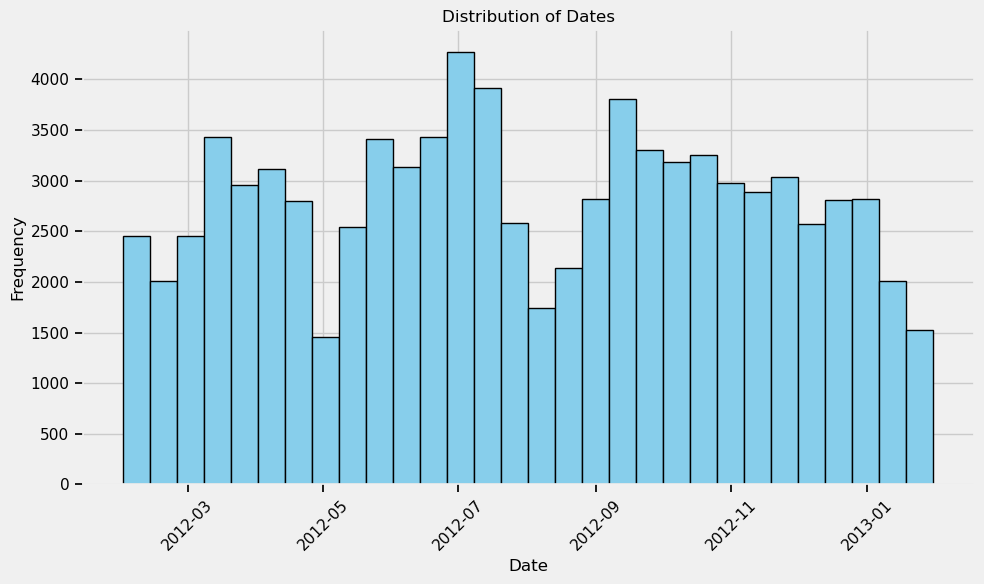

In [12]:
# Convert to date-time
mod_df_with_dates['TDATE'] = pd.to_datetime(mod_df_with_dates['TDATE'], errors='coerce')

# Drop rows with NaT in 'TDATE' to focus on valid dates
valid_dates = mod_df_with_dates.dropna(subset=['TDATE'])

# Plot the distribution of 'TDATE' as a histogram
plt.figure(figsize=(10, 6))
plt.hist(valid_dates['TDATE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify Students & Workers in the Dataset

In [13]:
# Load the CSV file, convert the '0' column to integers, and sort the list
sample_numbers_df = pd.read_csv('studentworkerSAMPN.csv')
sample_numbers_list = sample_numbers_df['0'].astype(int).tolist()
sample_numbers_list.sort()  # Sort the list in ascending order

# Ensure the SAMPN column in full_df is also converted to integers
full_df['SAMPN'] = full_df['SAMPN'].astype(int)

# Filter rows where SAMPN matches the sample numbers
df_work_stu = full_df[full_df['SAMPN'].isin(sample_numbers_list)]

# Sort the filtered DataFrame by the SAMPN column in ascending order
df_work_stu = df_work_stu.sort_values(by='SAMPN', ascending=True)

In [14]:
# Verify Results
print("First 5 values in sample_numbers_list:", sample_numbers_list[:5])
print("Last 5 values in sample_numbers_list:", sample_numbers_list[-5:])

First 5 values in sample_numbers_list: [1032036, 1032053, 1032425, 1033586, 1033944]
Last 5 values in sample_numbers_list: [7212027, 7212128, 7212273, 7212324, 7212388]


In [15]:
# Get the unique values in the SAMPN column and sort them
unique_values = sorted(df_work_stu['SAMPN'].unique())

# Display the first 5 unique values
print("First 5 unique values in SAMPN:", unique_values[:5])

# Display the last 5 unique values
print("Last 5 unique values in SAMPN:", unique_values[-5:])

First 5 unique values in SAMPN: [1032036, 1032053, 1032425, 1033586, 1033944]
Last 5 unique values in SAMPN: [7212027, 7212128, 7212273, 7212324, 7212388]


In [16]:
df_work_stu.to_csv('workers_students_data.csv')

# Data Extraction for API Merging

In [17]:
# Calculate the range of dates
min_date = mod_df_with_dates['TDATE'].min()
max_date = mod_df_with_dates['TDATE'].max()

# Display the date range
print("Date range:", min_date, "to", max_date)

Date range: 2012-02-01 00:00:00 to 2013-01-31 00:00:00


In [18]:
# Select 'SAMPN', 'PERNO', and any column containing 'ZIP' in its name
zip_columns = [col for col in mod_df_with_dates.columns if 'ZIP' in col]
selected_columns = ['SAMPN', 'PERNO'] + zip_columns

# Create a new DataFrame with the selected columns
df_zip_data = mod_df_with_dates[selected_columns]

# Display the new DataFrame
print(df_zip_data.head())


       SAMPN  PERNO    ZIP PREVZIP  HZIP LDOZIP LDDZIP WZIP  WZIP2 SZIP
0  1031985.0    1.0  94591     NaN   NaN    NaN    NaN  NaN    NaN  NaN
1  1031985.0    1.0  94510     NaN   NaN    NaN    NaN  NaN    NaN  NaN
2  1031985.0    1.0  94591     NaN   NaN    NaN    NaN  NaN    NaN  NaN
3  1031985.0    2.0  94591     NaN   NaN    NaN    NaN  NaN    NaN  NaN
4  1031985.0    2.0  94589     NaN   NaN    NaN    NaN  NaN    NaN  NaN


In [19]:
missing_percentage = df_zip_data.isna().mean() * 100

# Display the result
print(missing_percentage)

SAMPN       0.000000
PERNO      16.500559
ZIP        67.255493
PREVZIP    98.658715
HZIP       93.966068
LDOZIP     95.151282
LDDZIP     95.151282
WZIP       96.934684
WZIP2      99.806245
SZIP       98.191143
dtype: float64


In [20]:
# Select only the ZIP code columns
zip_columns = ['ZIP', 'PREVZIP', 'HZIP', 'LDOZIP', 'LDDZIP', 'WZIP', 'WZIP2', 'SZIP']

# Count unique ZIP codes across each row
unique_zip_counts = df_zip_data[zip_columns].nunique(axis=1)

# Count non-NaN values across each row
non_nan_counts = df_zip_data[zip_columns].notna().sum(axis=1)

# Check if each row has unique ZIP codes by comparing unique count with non-NaN count
df_zip_data['UniqueZIPs'] = unique_zip_counts == non_nan_counts

# Count rows where ZIP codes are not unique
non_unique_count = (~df_zip_data['UniqueZIPs']).sum()

# Display the result
print("Number of rows with non-unique ZIP codes:", non_unique_count)

Number of rows with non-unique ZIP codes: 8260


In [21]:
# Filter rows where 'TDATE' has a non-null value
dated_entries = mod_df_with_dates[mod_df_with_dates['TDATE'].notna()]

# Get unique values for cities and states
unique_cities = dated_entries['HCITY'].unique()
unique_states = dated_entries['HSTAT'].unique()

print("Unique cities with assigned dates:", unique_cities)
print("Unique states with assigned dates:", unique_states)

# Check the counts as well if needed
print("Total unique cities with assigned dates:", len(unique_cities))
print("Total unique states with assigned dates:", len(unique_states))

Unique cities with assigned dates: ['VALLEJO' 'SAN DIEGO' 'MERCED' ... 'HAWKINS BAR' 'ZENIA' 'HYAMPOM']
Unique states with assigned dates: ['CA' 'HI' 'OR']
Total unique cities with assigned dates: 1125
Total unique states with assigned dates: 3


In [ ]:
# Ensure ZIP codes are in string format to use prefix matching
dated_entries['HZIP'] = dated_entries['HZIP'].astype(str)

# Define ZIP code prefixes for California regions
zip_prefixes = {
    'Los Angeles': ['900', '901', '902', '903', '904', '905', '906', '907', '908'],
    'Pasadena': ['910', '911', '912', '913', '914', '915', '916', '917', '918'],
    'San Diego': ['919', '920', '921'],
    'Orange County': ['926', '927'],
    'San Francisco Bay Area': ['940', '941', '942', '943', '944', '945', '946', '947', '948', '949'],
    'San Jose': ['950', '951'],
    'Stockton': ['952'],
    'Sacramento': ['956', '957', '958']
}

# Combine all ZIP prefixes for easier filtering
all_prefixes = sum(zip_prefixes.values(), [])

# Filter the dated_entries DataFrame for entries with matching ZIP prefixes
filtered_dated_entries = dated_entries[dated_entries['HZIP'].str[:3].isin(all_prefixes)]
print(filtered_dated_entries.shape)
print(dated_entries.shape)

(53000, 258)
(84860, 258)
